In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv



1. step: represents a unit of time where 1 step equals 1 hour
2. type: type of online transaction
3. amount: the amount of the transaction
4. nameOrig: customer starting the transaction
5. oldbalanceOrg: balance before the transaction
6. newbalanceOrig: balance after the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
10. isFraud: fraud transaction

In [2]:
df=pd.read_csv('/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# EDA

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

<AxesSubplot:xlabel='step', ylabel='Count'>

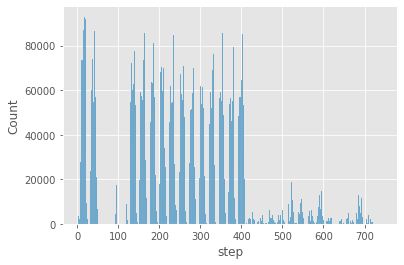

In [8]:
#step
sns.histplot(data=df,x='step')

<AxesSubplot:xlabel='step'>

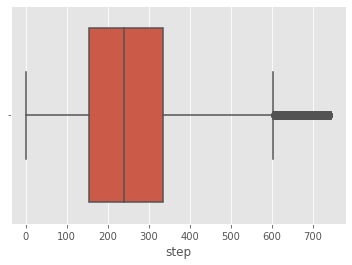

In [9]:
sns.boxplot(data=df,x='step')

<AxesSubplot:xlabel='type', ylabel='count'>

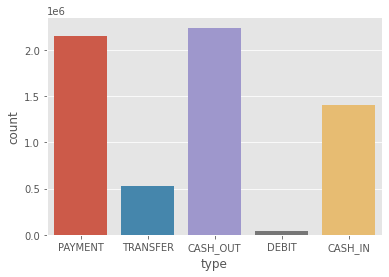

In [10]:
#type
sns.countplot(data=df,x='type')

<AxesSubplot:xlabel='amount', ylabel='Count'>

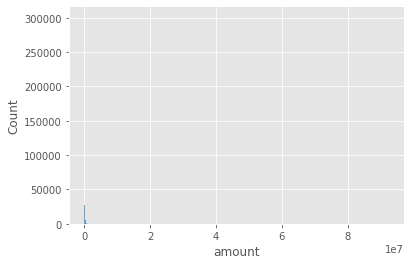

In [11]:
#amount
sns.histplot(data=df,x='amount')

<AxesSubplot:xlabel='amount'>

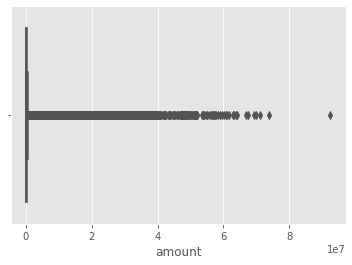

In [12]:
#amount
sns.boxplot(data=df,x='amount')

<AxesSubplot:xlabel='oldbalanceOrg', ylabel='Count'>

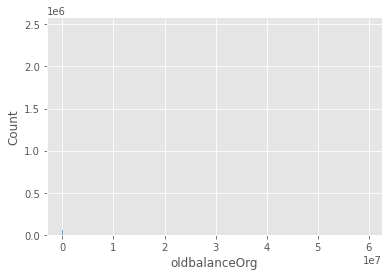

In [13]:
#oldbalanceOrg
sns.histplot(data=df,x='oldbalanceOrg')

In [14]:
#nameDest
df['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

<AxesSubplot:xlabel='oldbalanceDest'>

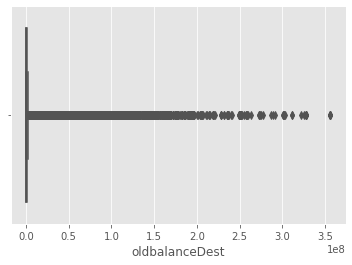

In [15]:
#oldbalanceDest
sns.boxplot(data=df,x='oldbalanceDest')

<AxesSubplot:xlabel='newbalanceDest'>

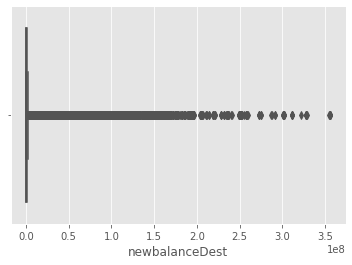

In [16]:
#newbalanceDest
sns.boxplot(data=df,x='newbalanceDest')

<AxesSubplot:xlabel='isFraud', ylabel='count'>

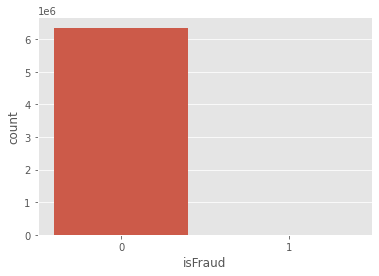

In [17]:
#isFraud:
sns.countplot(data=df,x='isFraud')

In [18]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [19]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

<AxesSubplot:>

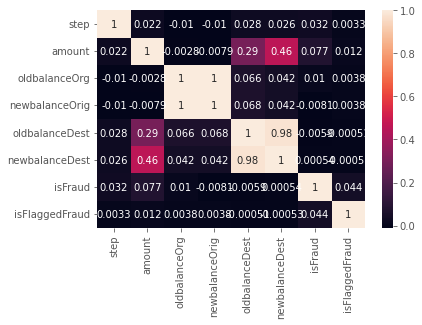

In [20]:
sns.heatmap(df.corr(),annot=True)

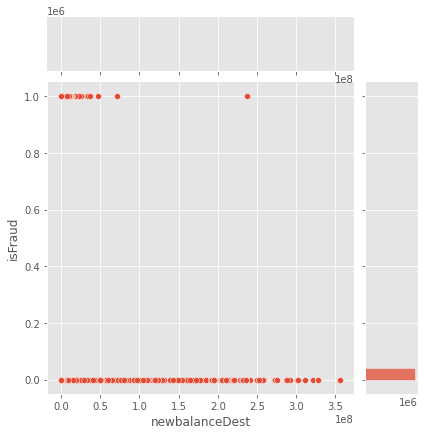

In [21]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')

<AxesSubplot:xlabel='type', ylabel='count'>

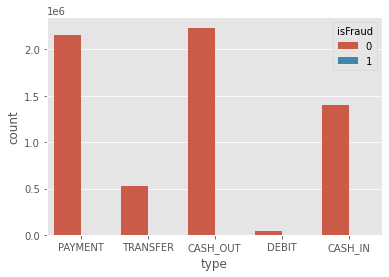

In [22]:
sns.countplot(data=df,x='type',hue='isFraud')

<AxesSubplot:xlabel='isFraud', ylabel='step'>

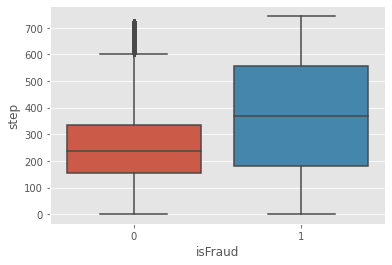

In [23]:
sns.boxplot(data=df,x='isFraud',y='step')

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

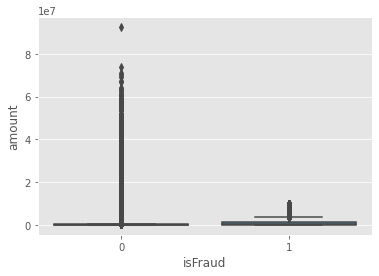

In [24]:
sns.boxplot(data=df,x='isFraud',y='amount')

<AxesSubplot:xlabel='isFraud', ylabel='oldbalanceOrg'>

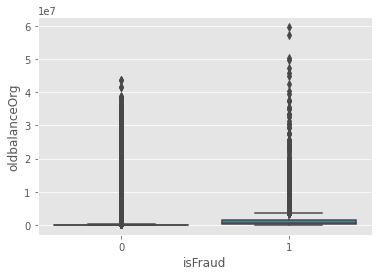

In [25]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceOrg')

<AxesSubplot:xlabel='isFraud', ylabel='newbalanceOrig'>

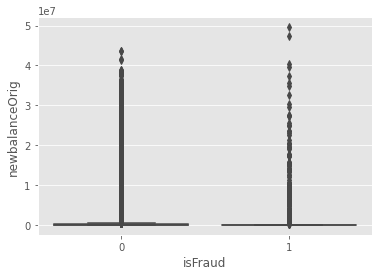

In [26]:
sns.boxplot(data=df,x='isFraud',y='newbalanceOrig')

<AxesSubplot:xlabel='isFraud', ylabel='oldbalanceDest'>

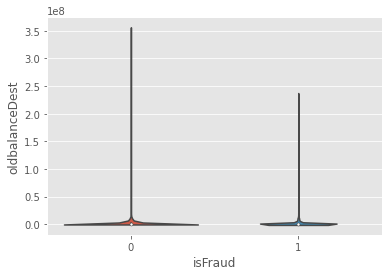

In [27]:
sns.violinplot(data=df,x='isFraud',y='oldbalanceDest')

<AxesSubplot:xlabel='isFraud', ylabel='newbalanceDest'>

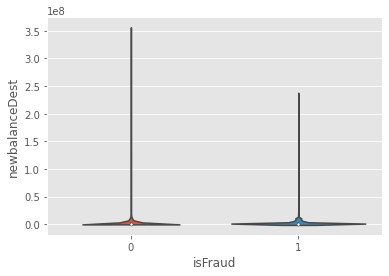

In [28]:
sns.violinplot(data=df,x='isFraud',y='newbalanceDest')


# 데이터 전처리

## 'nameOrig','nameDest'삭제

In [29]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


## Object data labelencoding

In [31]:
from sklearn.preprocessing import LabelEncoder

la=LabelEncoder()
df['type']=la.fit_transform(df['type'])


In [32]:
df['type'].value_counts()

1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: type, dtype: int64

## 데이터 나누기

In [33]:
X=df.drop('isFraud',axis=1)
y=df['isFraud']

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)


In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(5090096, 8)
(1272524, 8)
(1272524,)
(5090096,)


## Modeling

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

### RandomForest

In [37]:
rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print("랜덤 포레스트 정확도:{0:.4f}".format(accuracy))

랜덤 포레스트 정확도:0.9997


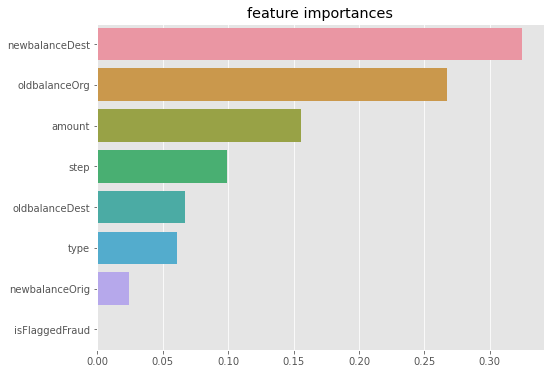

In [38]:
ftr_importances_values=rf_clf.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title("feature importances")
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

### LogisticRegression

In [39]:
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)

print("정확도 : {:0.4f}".format(accuracy_score(y_test,lr_pred)))

정확도 : 0.9983


랜덤포레스트보다 시간이 훨씬 덜 들었음

### XGBoost

In [40]:
xgb=XGBClassifier(random_state=0)
xgb.fit(X_train,y_train)
pred=xgb.predict(X_test)
print("정확도 : {:0.4f}".format(accuracy_score(y_test,pred)))

정확도 : 0.9998


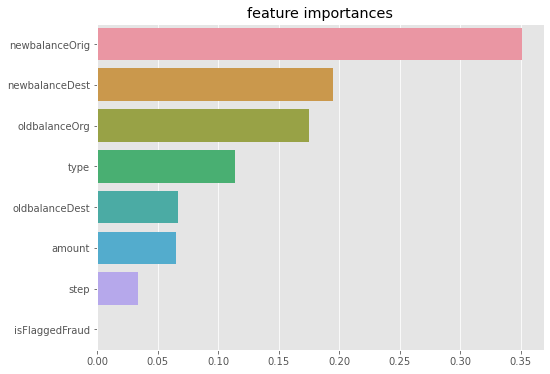

In [41]:
ftr_importances_values=xgb.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title("feature importances")
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()